In [65]:
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
filename = '/Users/santanubhattacharjee/Data/SQuAD2_0/train-v2_0.json'

if filename:
    with open(filename, 'r') as f:
        squad_dict = json.load(f)

In [3]:
squad_dict["version"]

'v2.0'

### Total 442 Titles like 'Beyoncé', 'Frédéric_Chopin', 'Sino-Tibetan_relations_during_the_Ming_dynasty' etc.

In [4]:
len(squad_dict["data"])

# 442 Titles like 'Beyoncé', 'Frédéric_Chopin', 'Sino-Tibetan_relations_during_the_Ming_dynasty' etc.

442

In [5]:
squad_dict["data"][0]['title']

'Beyoncé'

In [6]:
import io
titles = []
for title in squad_dict["data"]:
    titles.append(title['title'])

df1 = pd.DataFrame({'Titles': titles})
#pd.concat([df.T[x] for x in df.T], ignore_index=True)
print(titles)
#df1.to_csv('SquadTitles.csv')

['Beyoncé', 'Frédéric_Chopin', 'Sino-Tibetan_relations_during_the_Ming_dynasty', 'IPod', 'The_Legend_of_Zelda:_Twilight_Princess', 'Spectre_(2015_film)', '2008_Sichuan_earthquake', 'New_York_City', 'To_Kill_a_Mockingbird', 'Solar_energy', 'Kanye_West', 'Buddhism', 'American_Idol', 'Dog', '2008_Summer_Olympics_torch_relay', 'Genome', 'Comprehensive_school', 'Republic_of_the_Congo', 'Prime_minister', 'Institute_of_technology', 'Wayback_Machine', 'Dutch_Republic', 'Symbiosis', 'Canadian_Armed_Forces', 'Cardinal_(Catholicism)', 'Iranian_languages', 'Lighting', 'Separation_of_powers_under_the_United_States_Constitution', 'Architecture', 'Human_Development_Index', 'Southern_Europe', 'BBC_Television', 'Arnold_Schwarzenegger', 'Plymouth', 'Heresy', 'Warsaw_Pact', 'Materialism', 'Christian', 'Sony_Music_Entertainment', 'Oklahoma_City', 'Hunter-gatherer', 'United_Nations_Population_Fund', 'Russian_Soviet_Federative_Socialist_Republic', 'Alexander_Graham_Bell', 'Pub', 'Internet_service_provider',

### Total 19,035 paragraphs available in training dataset (Avg 43 paragraphs per title)

In [7]:
list1 = []
for i in range(len(squad_dict["data"])):
    list1.extend([len(squad_dict["data"][i]['paragraphs'])])

list1.sort()

print('Pragraphs count by title:', list1)
print('Total number of paragraphs:', sum(list1))

# Total 19,035 passages available in training dataset 

Pragraphs count by title: [10, 10, 12, 12, 12, 12, 12, 13, 13, 14, 16, 16, 16, 17, 18, 18, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 4

### Paragraphs distribution over titles (by count)

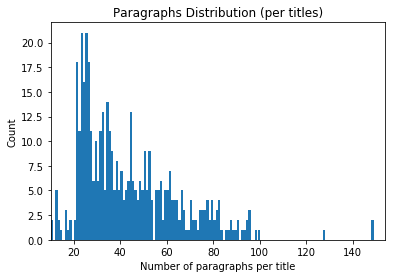

In [8]:
data = np.asarray(list1) 
bins = range(10,150)
plt.xlim([min(data), max(data)+5])
plt.hist(data, bins=bins)
plt.title('Paragraphs Distribution (per titles)')
plt.xlabel('Number of paragraphs per title')
plt.ylabel('Count')

plt.show()

In [55]:
questions_categories_count = {'what': 0, 'when':0, 'where':0, 'which':0, 'who':0, 'whose':0, 'why':0, 'how':0}
wh_ques_flag = False
other_ques = []

test_str = "In which city and state did Beyonce  grow up?"

for word in test_str.lower().split():
    if word in questions_categories_count:
        questions_categories_count[word] += 1
        wh_ques_flag = True
        break

if wh_ques_flag == False:
    other_ques.append(test_str)
wh_ques_flag = False

print(other_ques)
print(questions_categories_count)

[]
{'what': 0, 'when': 0, 'where': 0, 'which': 1, 'who': 0, 'whose': 0, 'why': 0, 'how': 0}


In [70]:
question = re.sub('[^A-Za-z0-9]+', ' ', 'According to Diane McWhorter, every child in the South had to face what?')
x = question.lower().split()
x

['according',
 'to',
 'diane',
 'mcwhorter',
 'every',
 'child',
 'in',
 'the',
 'south',
 'had',
 'to',
 'face',
 'what']

In [75]:
questions_categories_count = {'what': 0, 'when':0, 'where':0, 'which':0, 'who':0, 'whose':0, 'whom':0, 'why':0, 'how':0}
wh_ques_flag = False
other_ques = []
ques = []

for i in range(len(squad_dict["data"])):
    for j in range(len(squad_dict["data"][i]['paragraphs'])):
        for k in range(len(squad_dict["data"][i]['paragraphs'][j]['qas'])):
            question = re.sub('[^A-Za-z0-9]+', ' ', squad_dict["data"][i]['paragraphs'][j]['qas'][k]['question'])
            for word in question.lower().split():
                if word in questions_categories_count:
                    questions_categories_count[word] += 1
                    wh_ques_flag = True
                    lst = question.lower().split()
                    if lst.index(word) > 0 and len(ques) < 50:
                        ques.append(squad_dict["data"][i]['paragraphs'][j]['qas'][k]['question'])
                    break
                
            if wh_ques_flag == False:
                other_ques.append(squad_dict["data"][i]['paragraphs'][j]['qas'][k]['question'])
            wh_ques_flag = False
                        

print(questions_categories_count)
print(len(other_ques))
#print(ques)

{'what': 77272, 'when': 8209, 'where': 5283, 'which': 8233, 'who': 13410, 'whose': 462, 'whom': 448, 'why': 1907, 'how': 13277}
1818


### Total questions: 1,30,319 and Min and Max questions from a paragraph: 1, 30 (Avg 7 questions per paragraphs)

In [25]:
list2 = []
for i in range(len(squad_dict["data"])):
    for j in range(len(squad_dict["data"][i]['paragraphs'])):
        list2.extend([len(squad_dict["data"][i]['paragraphs'][j]['qas'])])

list2.sort()

print('Questions count by title (min and max):', list2[0], list2[len(list2)-1])
print('Total number of questions:', sum(list2))

Questions count by title (min and max): 1 30
Total number of questions: 130319


### Questions distribution over paragraphs (by count)

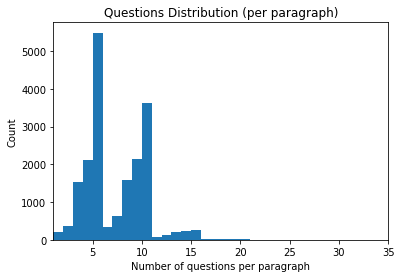

In [34]:
data = np.asarray(list2) 
bins = range(1,30)
plt.xlim([min(data), max(data)+5])
plt.hist(data, bins=bins)
plt.title('Questions Distribution (per paragraph)')
plt.xlabel('Number of questions per paragraph')
plt.ylabel('Count')

plt.show()

In [4]:
len(squad_dict["data"][0]['paragraphs'][3]['qas'])

13

Pragraphs count by title: [21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 26, 28, 30, 31, 31, 37, 39, 39, 39, 39, 39, 40, 43, 44, 44, 44, 44, 46, 46, 47, 48, 49, 49]
Total number of paragraphs: 1204


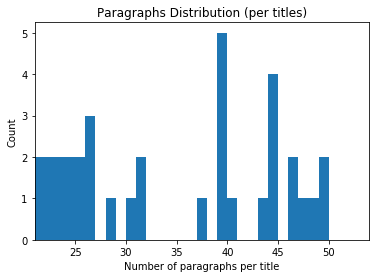

Questions count by title (min and max): 3 28
Total number of questions: 11873


In [5]:
filename = '/Users/santanubhattacharjee/Data/SQuAD2_0/dev-v2_0.json'

if filename:
    with open(filename, 'r') as f:
        squad_dict = json.load(f)
        
list1 = []
for i in range(len(squad_dict["data"])):
    list1.extend([len(squad_dict["data"][i]['paragraphs'])])

list1.sort()

print('Pragraphs count by title:', list1)
print('Total number of paragraphs:', sum(list1))

data = np.asarray(list1) 
bins = range(10,150)
plt.xlim([min(data), max(data)+5])
plt.hist(data, bins=bins)
plt.title('Paragraphs Distribution (per titles)')
plt.xlabel('Number of paragraphs per title')
plt.ylabel('Count')

plt.show()

list2 = []
for i in range(len(squad_dict["data"])):
    for j in range(len(squad_dict["data"][i]['paragraphs'])):
        list2.extend([len(squad_dict["data"][i]['paragraphs'][j]['qas'])])

list2.sort()

print('Questions count by title (min and max):', list2[0], list2[len(list2)-1])
print('Total number of questions:', sum(list2))

In [8]:
type(range(5))

range